# Projeto 3: Ciências dos Dados
### Alunos: Isabella Oliveira e Patrick dos Santos

## Como a quantidade de anos estudados pela população feminina e a renda per capita de um país podem explicar e/ou até influenciar a sua fertilidade.

#### Todos os dados dessa pesquisa foram obtidos no ano de 2007.

In [48]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import patsy
import scipy

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Isabella\Documents\GitHub\CD\Projeto3


### Inicialização da base de dados das variáveis

In [49]:
dados1 = pd.read_excel('fertility.xlsx',index_col=0)
dados2 = pd.read_excel('incomepercapita.xlsx',index_col=0)
dados3 = pd.read_excel('literacy.xlsx',index_col=0)
dados4 = pd.read_excel('employment.xlsx', index_col=0)

### Tratamento dos dados e união das variáveis em um único Data Frame:

In [136]:
fertil = pd.DataFrame(dados1.V2007[pd.notnull(dados1.V2007)])
income = pd.DataFrame(dados2.V2007[pd.notnull(dados2.V2007)])
literacy = pd.DataFrame(dados3.V2007[pd.notnull(dados3.V2007)])
empregos = pd.DataFrame(dados4.V2007[pd.notnull(dados4.V2007)])
#lnfertil = pd.DataFrame(np.log(dados1.V2007[dados1.V2007>=0]))
lnincome = pd.DataFrame(np.log(dados2.V2007[pd.notnull(dados2.V2007)]))
final = fertil.join(income, lsuffix='Fertilidade', rsuffix = 'Renda')
final = final.join(literacy, lsuffix='Renda', rsuffix='Estudos')
final = final.join(empregos, lsuffix = 'Estudos', rsuffix ='Empreg')
final = final.join(lnincome, lsuffix ='Empreg', rsuffix ='LNRenda')

final = final[pd.notnull(final.V2007Fertilidade)]
final = final[pd.notnull(final.V2007Renda)]
final = final[pd.notnull(final.V2007Estudos)]
final = final[pd.notnull(final.V2007Empreg)]
final = final[pd.notnull(final.V2007)]
aqui = final

final

,V2007Fertilidade,V2007Renda,V2007Estudos,V2007Empreg,V2007
Total fertility rate,,,,,
Afghanistan,6.46,1298.0,0.7,25.600000,7.168580
Albania,1.80,7977.0,10.5,42.099998,8.984318
Algeria,2.66,12289.0,6.8,31.700001,9.416460
Angola,6.52,6453.0,4.3,69.400002,8.772300
Argentina,2.25,13873.0,11.3,45.900002,9.537700
Armenia,1.40,6877.0,11.3,34.200001,8.835938
Australia,1.92,40643.0,12.6,54.599998,10.612582
Austria,1.38,43418.0,11.3,49.700001,10.678629
Azerbaijan,1.99,13243.0,11.7,56.200001,9.491224


Nesse projeto, pretendemos estudar como as varáveis "Anos estudados por mulheres em idade fértil" e "Renda Per Capita" podem ser relacionadas com a taxa de fertilidade (número de crianças/número de mulheres) entre as mulheres de diversos países. Para isso, utilizamos diferentes bases de dados encontradas no site https://www.gapminder.org/ para estudarmos a correlação entre essas variáveis e assim utilizar a regressão para estimarmos os parâmentros que definem o modelo aqui estudado. A estimativa dos parâmetros se encontram no desenvolvimento desse relatório.

### Análise Descritiva

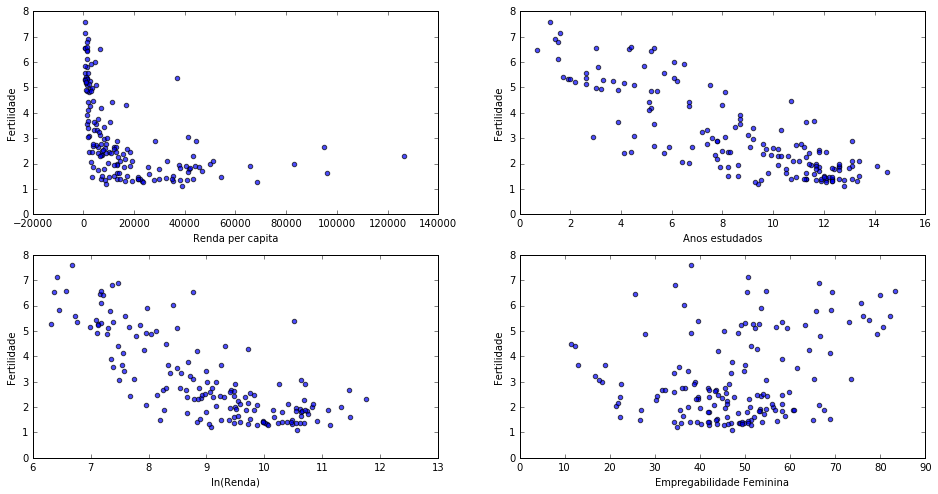

In [59]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(final.V2007Renda, final.V2007Fertilidade, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("Renda per capita")
ax[0,0].set_ylabel("Fertilidade")

ax[0,1].scatter(final.V2007Estudos, final.V2007Fertilidade, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Anos estudados")
ax[0,1].set_ylabel("Fertilidade")
ax[0,1].set_xlim(0,16)


ax[1,0].scatter(final.V2007, final.V2007Fertilidade, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("ln(Renda)")
ax[1,0].set_ylabel("Fertilidade")

ax[1,1].scatter(final.V2007Empreg, final.V2007Fertilidade, alpha=0.7)  # Plot the raw data
ax[1,1].set_xlabel("Empregabilidade Feminina")
ax[1,1].set_ylabel("Fertilidade")


Gráficos que relacionam nossa variável resposta com nossas variáveis descritivas.

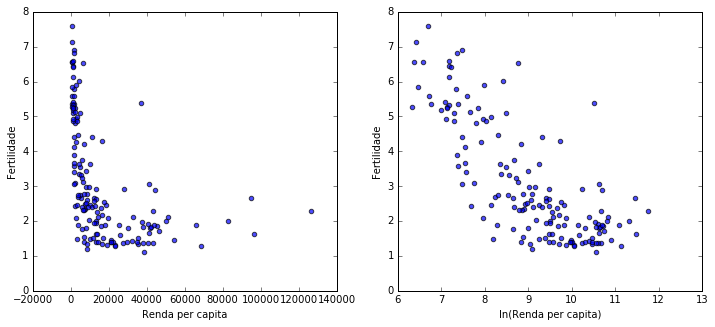

In [60]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[1].scatter(np.log(final.V2007Renda), final.V2007Fertilidade, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("ln(Renda per capita)")
ax[1].set_ylabel("Fertilidade")

ax[0].scatter(final.V2007Renda, final.V2007Fertilidade, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Renda per capita")
ax[0].set_ylabel("Fertilidade")


Como o gráfico Renda per capita X Fertilidade resultou em uma aglomeração de dados que se assemelham à uma função logarítmica e a regressão que pretendemos fazer é linear, a função "log" foi utilizada para que a nossa relação Renda X Fertilidade fosse mais próxima de uma função linear. Portanto, a partir de agora estudaremos a relação ln(Renda) X Fertilidade e não Renda X Fertilidade.

In [61]:
final.corr(method='pearson')

,V2007Fertilidade,V2007Renda,V2007Estudos,V2007Empreg,V2007
V2007Fertilidade,1.000000,-0.480463,-0.824734,0.268604,-0.773827
V2007Renda,-0.480463,1.000000,0.527169,-0.120603,0.819358
V2007Estudos,-0.824734,0.527169,1.000000,-0.176363,0.784711
V2007Empreg,0.268604,-0.120603,-0.176363,1.000000,-0.315087
V2007,-0.773827,0.819358,0.784711,-0.315087,1.000000


#### Pela tabela acima, que indica a correlação de cada uma das nossas variáveis aleatórias com nossa variável resposta, podemos perceber que há uma correlação forte (e negativa) entre a fertilidade e a variável anos estudados (-0.825) e entre a fertilidade e a variável Renda ajustada com a  função logarítmica (-0.774). 

#### Há uma correlação mais fraca, porém significativa entre as variáveis Renda e Empregabilidade das mulheres no período fértil e a fertilidade (-0.48 e 0.269, respectivamente).

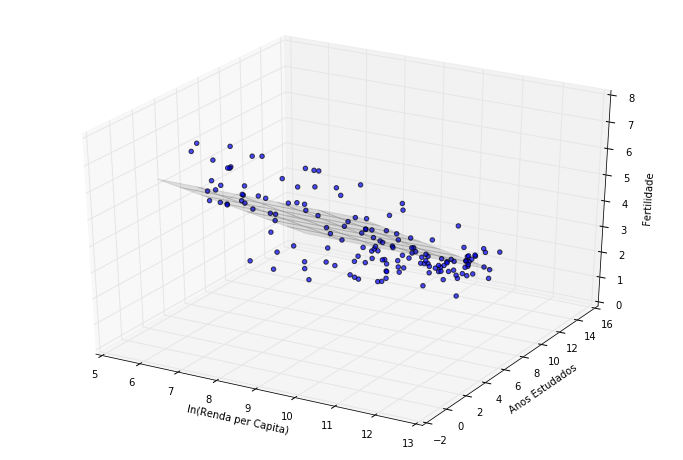

In [149]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='V2007Fertilidade ~ V2007Renda + V2007Estudos', data = final)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(6, 12, 1)                # generate a mesh
y_surf = np.arange(0, 16, 2)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'V2007': x_surf.ravel(), 'V2007Estudos': y_surf.ravel()})

patsy_data = patsy.dmatrix("V2007 + V2007Estudos", data=exog)

out = fit.predict(patsy_data, transform=False)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(final['V2007'], final['V2007Estudos'], final['V2007Fertilidade'],
           c='blue',
           marker='o',
           alpha=0.7)

#ax.set_xlim(0,100)
#ax.set_ylim(0,10)
ax.set_xlabel('ln(Renda per Capita)')
ax.set_ylabel('Anos Estudados')
ax.set_zlabel('Fertilidade')

### O gráfico acima relaciona a variável resposta "Fertilidade" com as variáveis explicativas "Anos estudados" e a variável ln(Renda).

In [123]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=final.V2007Fertilidade
X=final.iloc[:,(2,4)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()


,const,V2007Estudos,V2007
Total fertility rate,,,
Afghanistan,1,0.7,7.168580
Albania,1,10.5,8.984318
Algeria,1,6.8,9.416460
Angola,1,4.3,8.772300
Argentina,1,11.3,9.537700


In [124]:
model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       V2007Fertilidade   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     198.6
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           3.00e-43
Time:                        22:03:10   Log-Likelihood:                -200.53
No. Observations:                 156   AIC:                             407.1
Df Residuals:                     153   BIC:                             416.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            9.1447      0.604     15.131      0.000         7.951    10.339
V2007Estudos    -0.2642      0.032     -8.231      0.000        -0.328    -0.201
V2007           -0.4207      0.088     -4.793      0.000        -0.594    -0.247
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.415
Skew:                           0.019   Prob(JB):                        0.812
Kurtosis:                       3.250   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### O Parâmetro $\beta\ o$ ,  que é o estimado, representa o intercepto do nosso modelo, e seu valor é 9,1447. Isso significa que quando nossas taxas de Anos Estudados e Renda valem zero, nossa variável resposta Fertilidade (número de crianças por mulher) vale aproximadamente 9.

### O parâmetro $\beta\ 1$, que é o estimado, representa os coeficientes angulares em relação a nossa variável resposta e as duas variáveis explicativas. O valor -0,2642 nos indica que para cada unidade acrescida na variável x (no caso, para cada ano acrescido na variável 'anos estudados'), a taxa de fertilidade decresce 0,2642. Já quando é acrescida uma unidade na função logarítimica da renda, a variável taxa de fertilidade decresce em 0,4207.

### O teste F é um teste que verifica a hipótese nula de que nossos dados podem ser modelados com todos os coeficientes iguais a 0. Sua hipótese nula é de que pelo menos um desses coeficientes não é igual a zero. Se a probabilidade do nosso teste F for menor do que nosso p-value, a nossa hipótese nula é rejeitada.

### No nosso caso, a hipótese nula (Ho) é de que todos os coeficientes sejam iguais à zero e a hipótese alternativa (H1) é de que pelo menos um dos nossos coeficientes não seja igual à 0. A probabilidade do F indicada na tabela anterior é muito menor do que o nosso p-value. Isso indica que a nossa Ho é recusada e que, portanto, as 2 variáveis explicativas interferem na variável resposta.

### O R² é o coeficiente de determinação da nossa regressão, é uma medida de ajustamento de um modelo estatístico linear generalizado, como a regressão linear, em relação aos valores observados. Ele pode ser utilizado para definirmos se ela é ou não um bom modelo para nossos dados reais. Nosso R² é 0,722 e significa que o nosso modelo é adequado para estimar os parâmetros da relação dos nossos dados observados. Além disso, por ser um valor próximo de 1, o R² indica que nosso modelo obtido a partir da regressão tem uma boa qualidade de ajuste.

### O R² ajustado é o coeficiente de determinação com sua dimensão ajustada, pois ele leva em consideração os graus de liberdade e o número de observações dos nossos dados. O R² ajustado do nosso modelo é 0,718 e tem a mesma interpretação do R².


### O teste Omnibus testa a hipótese nula de que a distribuição residual em torno de 0 é normal. No nosso modelo, a probabilidade de Omnibus é 0,679, o que indica que nós não rejeitamos a hipótese nula de Omnibus.

### O teste Jarque-Bera testa a hipótese nula de que a distribuição residual dos nossos dados seja normal. No caso do nosso modelo, a probabilidade de JB é 0,812, o que nos faz não rejeitar a hipótese nula do teste Jarque-Bera.

### O teste Durbin varia de 0 à 4 e avalia a autocorrelação das nossas variáveis. Valores obtidos pelo teste Durbin próximos à 2 (como é o nosso caso, já que obtivemos 2,074) indicam que as variáveis não são autocorrelacionadas.

## Agora veremos se o modelo obtido pela regressão que realizamos é tão bom para um subconjunto da população quanto ele é para a população inteira.

### Utilizaremos o subconjunto da nossa população que tem a variável 'Anos Estudados' das mulheres do país em período fértil maior ou igual à 10 anos de estudo (Logo, um conjunto de países que investem bastante em educação).

In [147]:
final2 = pd.DataFrame(final.V2007Estudos[final.V2007Estudos>= 10])

final2 = aqui.join(final2, rsuffix ='10')
final2 = final2[pd.notnull(final2.V2007Estudos10)]

y=final2.V2007Fertilidade
X=final2.iloc[:,(5)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       V2007Fertilidade   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     10.22
Date:                Tue, 06 Dec 2016   Prob (F-statistic):            0.00212
Time:                        22:48:53   Log-Likelihood:                -61.858
No. Observations:                  69   AIC:                             127.7
Df Residuals:                      67   BIC:                             132.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              4.7715      0.889      5.369      0.000         2.997     6.545
V2007Estudos10    -0.2393      0.075     -3.198      0.002        -0.389    -0.090
==============================================================================
Omnibus:                       26.509   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.471
Skew:                           1.445   Prob(JB):                     3.63e-10
Kurtosis:                       5.601   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Na análise com o subconjunto podemos perceber que o R² é muito inferior do que o obtido anteriormente e portanto nossa regressão não se aplica tão bem levando em consideração apenasos países com taxa de "anos estudados por mulheres em idade fértil" de 10 ou mais anos. Isto é porque nesse caso as duas variáveis explicativas estudadas não interferem tanto na variável resposta e porque provavelmente outra variável explicativa é a principal modificadora do cenário. Aplicando ao mundo real, é possível inferir que esse resultado é devido ao maior investimento (tanto das pessoas, quanto dos governos dos países que apresentam taxa de "Anos estudados por mulheres em idade fértil" alta) na educação e isso fez com que as mulheres e suas respectivas famílias tivessem um melhor planejamento familiar, o que é um fator bem relevante e que reduz a taxa de fertilidade nesses países (geralmente países desenvolvidos).

### Teste de White

In [103]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)
#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2, X)

(20.900143696195865,
 0.00084601176023835992,
 4.6410435069294795,
 0.00057432169080241932)

In [113]:
fit.resid

Total fertility rate
Afghanistan               0.516164
Albania                  -0.790659
Algeria                  -0.726428
Angola                    2.202036
Argentina                 0.103527
Armenia                  -1.041716
Australia                 0.569223
Austria                  -0.286464
Azerbaijan               -0.070341
Bahamas                   0.120283
Bahrain                   0.436967
Bangladesh               -2.312382
Belarus                  -0.516286
Belgium                   0.405919
Belize                    0.049515
Benin                     0.020356
Bolivia                   0.274420
Bosnia and Herzegovina   -1.629025
Botswana                 -0.183089
Brazil                   -0.935568
Bulgaria                 -0.465701
Burkina Faso              0.389473
Burundi                   0.981798
Cambodia                 -1.595325
Cameroon                  1.035724
Canada                    0.819312
Cape Verde               -1.289946
Chad                      1.268019

# Conclusão

### Após as análises aqui apresentadas, é possível concluir que as variáveis explicativas 'Anos Estudados pela população feminina em idade fértil" e "Renda per capita" interferem na "Taxa de Fertilidade" no mundo.
### Podemos perceber que quanto mais anos as mulheres estudam, menos filhos elas costumam ter. Assim como quanto maior a renda per capita do país, menor é a taxa de filhos por mulher.
### Utilizando o mesmo modelo obtido, percebemos que não é uma boa ideia aplicá-lo para um subgrupo, como a população de alguns países específicos, já que as variáveis independentes podem explicar bem o comportamento de uma variável resposta para uma amostra, porém ao pegarmos uma subamostra não tão aleatória, a variável resposta dessa subamostra pode ser influenciada mais fortemente por outra variável independente que para a análise da amostra original não é relevante. 